In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import pickle
with open('../Artifacts/model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [4]:
type(loaded_model)

sklearn.ensemble._forest.RandomForestRegressor

In [5]:
df = pd.read_csv('FinalData.csv')
df.head()

,Unnamed: 0,Total sqft,price,bhk,location_weight,housing_type_IndependentFloor,housing_type_IndependentHouse,housing_type_StudioApartment,housing_type_Villa,type_RK
0,0,984,305.00,3,5.739457,0,0,0,0,0
1,1,598,142.00,2,3.884219,0,0,0,0,0
2,2,738,154.00,2,4.063830,0,0,0,0,0
3,3,644,68.75,3,1.011668,0,0,0,0,0
4,4,582,145.00,2,3.359460,0,0,0,0,0


In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df

,Total sqft,price,bhk,location_weight,housing_type_IndependentFloor,housing_type_IndependentHouse,housing_type_StudioApartment,housing_type_Villa,type_RK
0,984,305.00,3,5.739457,0,0,0,0,0
1,598,142.00,2,3.884219,0,0,0,0,0
2,738,154.00,2,4.063830,0,0,0,0,0
3,644,68.75,3,1.011668,0,0,0,0,0
4,582,145.00,2,3.359460,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
2978,685,33.00,1,1.183813,0,0,0,0,0
2979,600,93.00,1,6.149801,0,0,0,0,0
2980,600,93.50,1,6.149801,0,0,0,0,0
2981,1425,310.00,3,6.149801,0,0,0,0,0


In [9]:
X = df.drop('price',axis=1)
y = df.price

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
y_pred = loaded_model.predict(X_test)

In [13]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 1429.3082760390723
Root Mean Squared Error: 37.80619362008125
R-squared (R2) Score: 0.9707118157661838


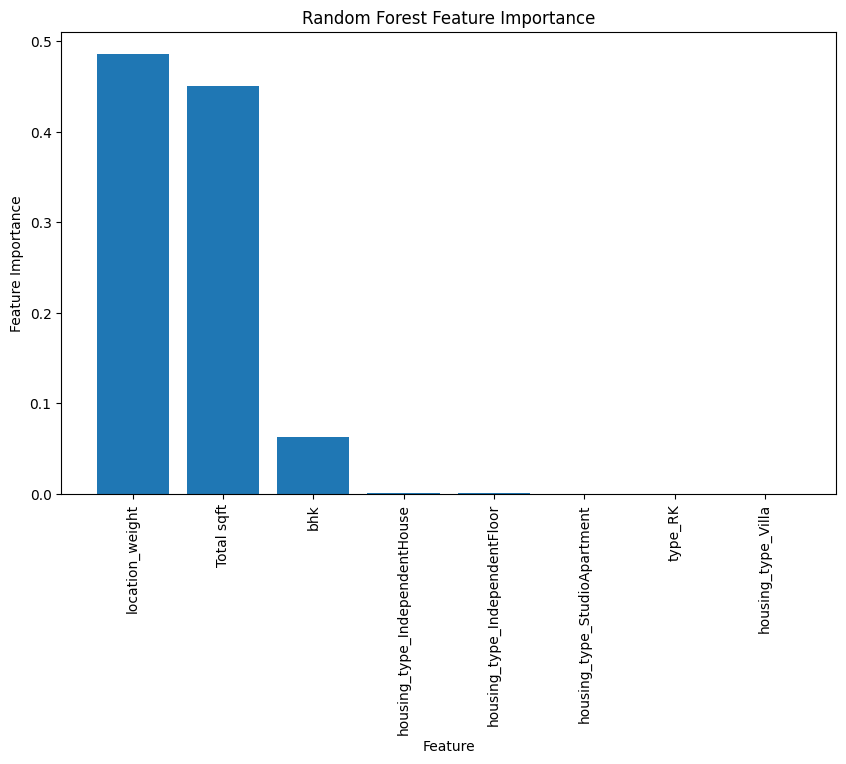

In [15]:
feature_importance = loaded_model.feature_importances_
feature_names = X.columns

# Sort feature importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_idx])
plt.xticks(range(len(feature_importance)), feature_names[sorted_idx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

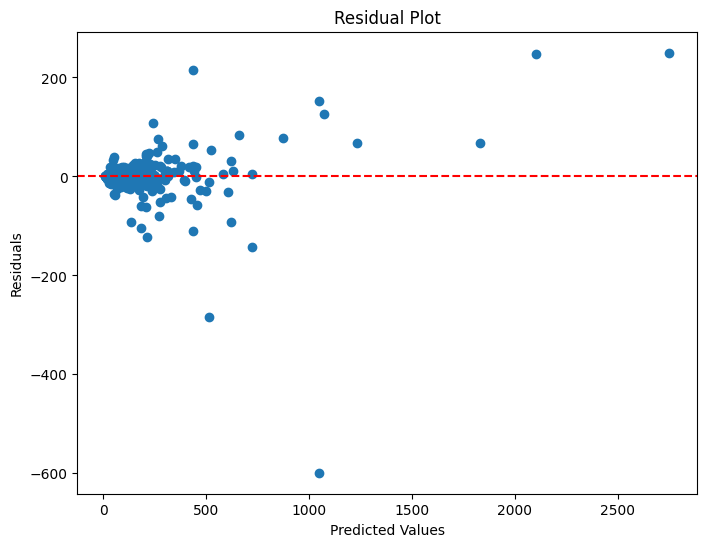

In [16]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()

In [28]:
train_scores=[]
test_scores=[]
rf=RandomForestRegressor()
for i in range(10,200,10):
    rf.set_params(n_estimators=i)
    rf.fit(X_train,y_train)
    train_scores.append(rf.score(X_train,y_train))
    test_scores.append(rf.score(X_test,y_test))

In [21]:
test_scores

[0.8964643080869451,
 0.8990376316129278,
 0.8973132475193768,
 0.897729532543443,
 0.8946808182531509,
 0.893482429214135,
 0.8885153709798852,
 0.8894550734503226,
 0.8927754474629257,
 0.8982715567053223]

In [33]:
x = []
for i in range (10,200,10):
    x.append(i)

    
    
x

[10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190]

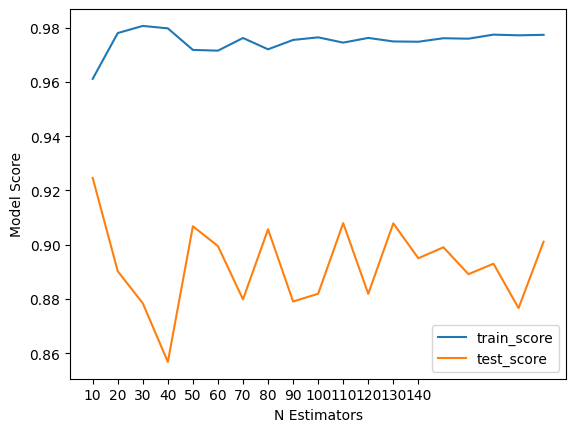

In [34]:
plt.plot(x,train_scores,label="train_score")
plt.plot(x,test_scores,label='test_score')
plt.xlabel("N Estimators")
plt.ylabel("Model Score")
plt.legend()
# to bring range of 10's
plt.xticks(np.arange(10,150,10));